In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv("./log/perf-out.csv")

In [3]:
df["EPI"]=df["power/energy-cores/"]/df["instructions"]

In [4]:
df["Frequency(Mhz)"] = 1800

In [5]:
df.to_csv("./log/EPI_1800.csv")

In [6]:
df.head()

,task-clock,page-faults,cycles,instructions,branches,branch-misses,L1-dcache-loads,L1-dcache-misses,cpu/cache-misses/,LLC-loads,LLC-misses,cpu/cache-references/,power/energy-cores/,EPI,Frequency(Mhz)
0,24005.015987,140,42977077225,60384659751,17885253337,36544384,17900609135,1989059,1423749,420370,131259,5690015,32.49,5.380506e-10,1800
1,24004.866939,144,42999378038,60834274048,18020853476,36643730,18026330828,1603232,1266030,447248,90310,4790034,32.46,5.335808e-10,1800
2,24004.320800,149,42963072141,60362628460,17885644053,36554826,17907132537,2162088,2007160,737036,241786,7623472,32.13,5.322830e-10,1800
3,24004.499135,141,42986217739,60400491448,17896790473,36414547,17912767126,1563558,991950,345051,84765,4117262,32.31,5.349294e-10,1800
4,24004.752739,4393,42946830513,60400679590,17877744626,37493153,17899071069,6047028,1883435,673731,143680,8464167,32.35,5.355900e-10,1800


In [7]:
df.tail()

,task-clock,page-faults,cycles,instructions,branches,branch-misses,L1-dcache-loads,L1-dcache-misses,cpu/cache-misses/,LLC-loads,LLC-misses,cpu/cache-references/,power/energy-cores/,EPI,Frequency(Mhz)
47,24004.913187,970,42974738700,60417721803,17906177112,36384696,17915140166,1603746,1460594,428207,100852,4355248,32.45,5.370941e-10,1800
48,24005.126558,1855,42998411946,60360647129,17878410235,36955247,17899536962,2384509,2048726,579784,172430,9159196,32.43,5.372706e-10,1800
49,24004.818261,768,42959309026,60395736146,17901379368,36394352,17912380180,1734088,1638340,407889,98567,3593069,32.41,5.366273e-10,1800
50,24004.184749,990,42980897559,60411599474,17901403773,36532216,17912184668,1955377,1384951,400711,102632,4656654,32.44,5.369830e-10,1800
51,24004.734138,977,42998635161,60359219151,17879992828,36561942,17896344583,2021752,1901388,531616,186492,7015916,33.79,5.598151e-10,1800


In [30]:
# processing all the EPI files
fdf = pd.read_csv("./log/processed/EPI_ALL.csv", index_col=0)


In [38]:
fdf = fdf.sort_values("Frequency(Mhz)")
fdf.head()

,task-clock,page-faults,cycles,instructions,branches,branch-misses,L1-dcache-loads,L1-dcache-misses,cpu/cache-misses/,LLC-loads,LLC-misses,cpu/cache-references/,power/energy-cores/,EPI,Frequency(Mhz)
51,24019.033144,139,9476372481,13190334774,3903078712,8218047,3912448495,1861294,938818,390097,48562,3935533,6.34,4.806550e-10,400
28,24018.638087,139,9478257153,13289171082,3933421328,8235244,3944855407,1711664,818908,388100,50505,3382559,6.30,4.740702e-10,400
29,24019.134623,536,9472453991,13101548656,3827508311,10021224,3858180703,11906410,3801635,3405588,294848,34134215,6.32,4.823857e-10,400
30,24018.764835,145,9478417838,13285179881,3929318649,8233128,3936608943,1820052,1165253,511522,75531,4996463,6.29,4.734599e-10,400
31,24018.698143,140,9477833737,13272212903,3927391162,8290582,3937772843,2107032,1197284,541194,64212,5260457,6.36,4.791967e-10,400


In [41]:
# correlation
corr = fdf.corr()

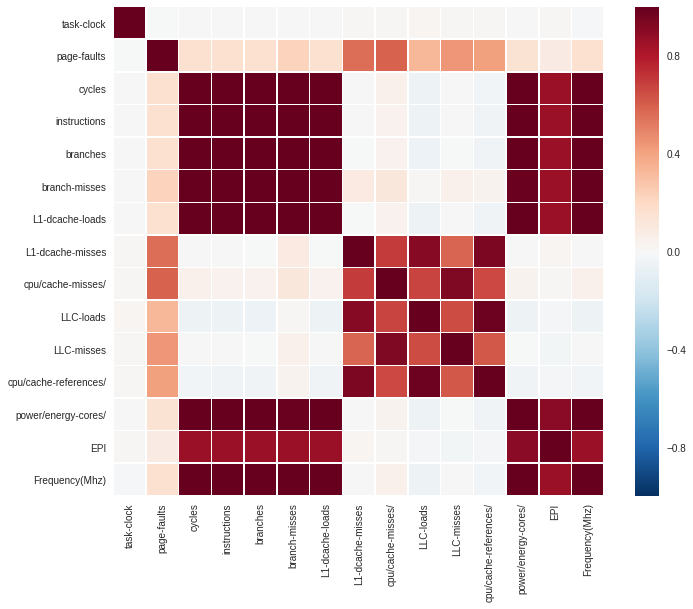

In [90]:
plt.figure(figsize=(11,9))
sns.heatmap(corr, linewidths=0.5)

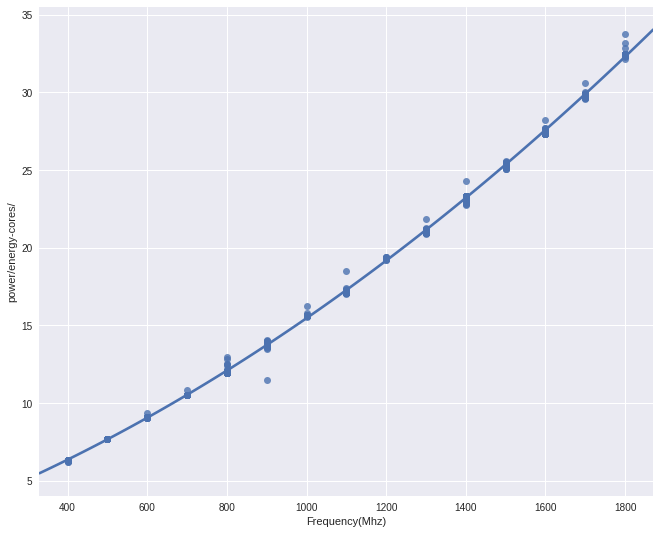

In [101]:
#Let's try to do a scatter plot between frequency and EPI
f, ax = plt.subplots(figsize=(11, 9))
sns.regplot(x="Frequency(Mhz)", y="power/energy-cores/", data=fdf, order=2, ax=ax)#, hue="Frequency(Mhz)")

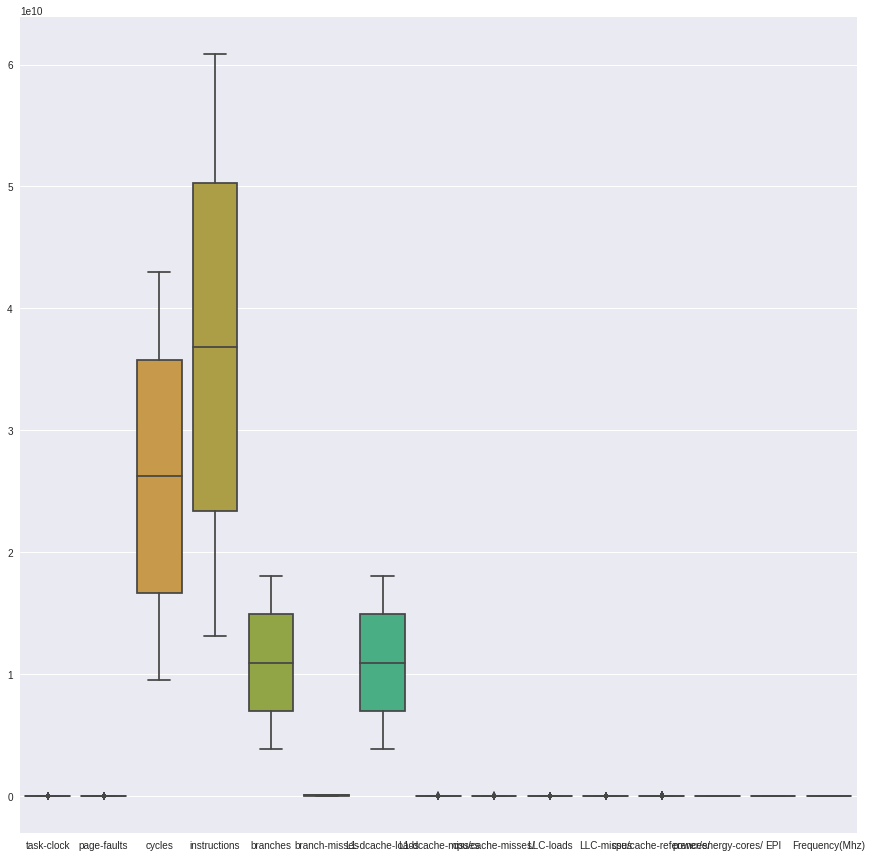

In [104]:
sns.boxplot(data=fdf)

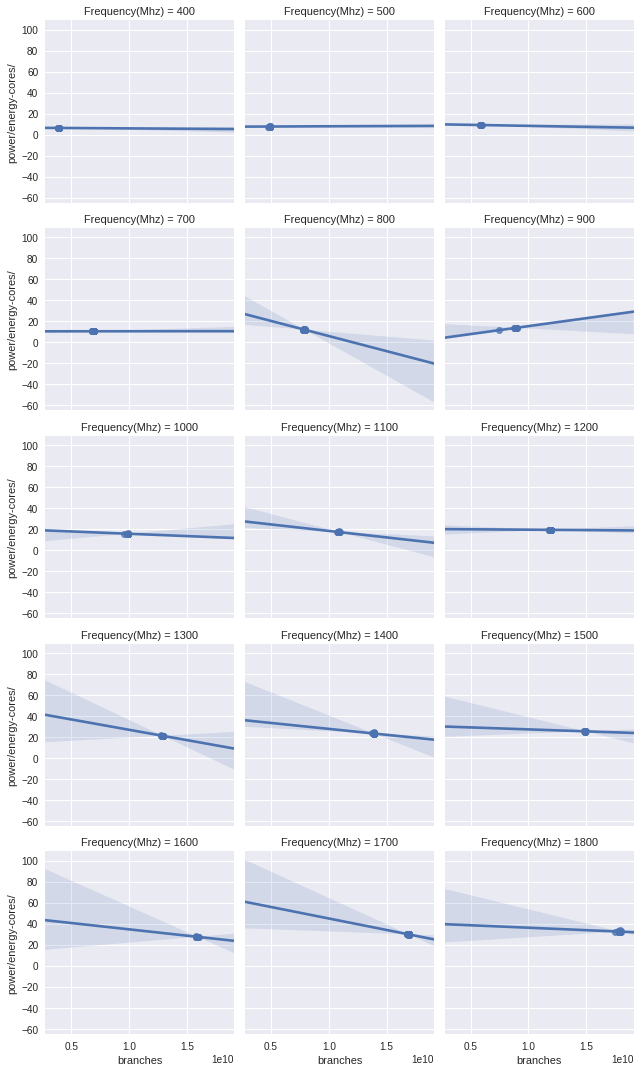

In [119]:
# lets plot the variables that highly correlate with power
# https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x="branches",
           y="power/energy-cores/",
           col="Frequency(Mhz)",
           data=fdf,
           col_wrap=3,
           size=3)

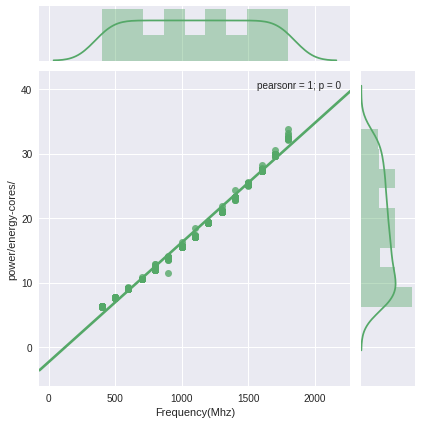

In [130]:
# jointplot: kind: 'scatter', 'reg', 'resid', 'kde', or 'hex'
# https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
sns.jointplot(x="Frequency(Mhz)", y="power/energy-cores/", data=fdf, kind="reg", color="g")

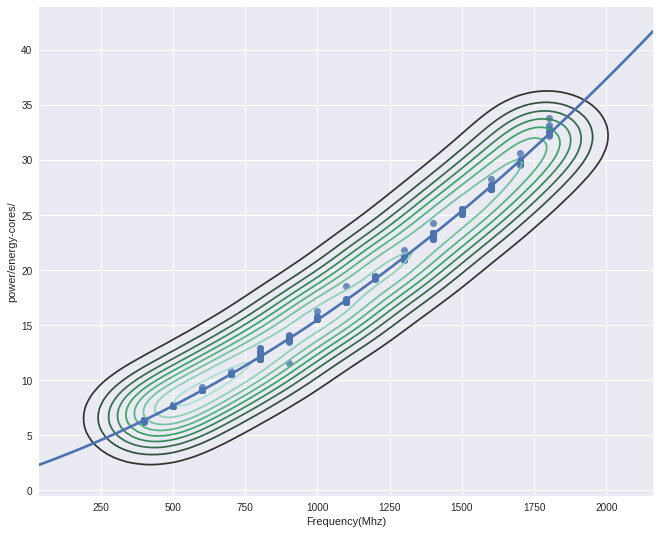

In [155]:
# density plot
# https://elitedatascience.com/python-seaborn-tutorial#step-8
plt.figure(figsize=(11,9))
sns.kdeplot(fdf["Frequency(Mhz)"], fdf["power/energy-cores/"])
sns.regplot(x="Frequency(Mhz)", y="power/energy-cores/", data=fdf, order=2)

In [152]:
# do a selective pairgrid
# https://seaborn.pydata.org/tutorial/axis_grids.html
# sns.PairGrid(fdf[7:])

In [158]:
# some linear modelling
import statsmodels.api as sm
model = sm.OLS(fdf["power/energy-cores/"], fdf["Frequency(Mhz)"])
result = model.fit()

In [160]:
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     power/energy-cores/   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 2.457e+05
Date:                 Thu, 17 Aug 2017   Prob (F-statistic):               0.00
Time:                         00:31:21   Log-Likelihood:                -1189.2
No. Observations:                  780   AIC:                             2380.
Df Residuals:                      779   BIC:                             2385.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Frequency(Mhz)     0.0167   3.37e-

In [163]:
# Ordinary least squares using sklearn
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# https://stats.stackexchange.com/questions/146804/difference-between-statsmodel-ols-and-scikit-linear-regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
# reg.fit(fdf["Frequency(Mhz)"], fdf["power/energy-cores/"])